In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Air Passengers.csv to Air Passengers.csv


In [ ]:
air= pd.read_csv('Air Passengers.csv')

In [ ]:
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
#air['Month']= air['Month'].apply(lambda x: pd.Period(x,'D'))

In [ ]:
#air['Month']

In [ ]:
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
air.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [ ]:
air.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
air.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

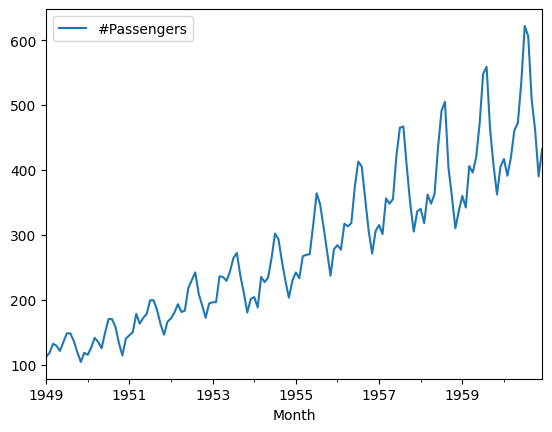

In [ ]:
air.set_index('Month',inplace=True)
air.index= pd.to_datetime(air.index)
air.dropna(inplace=True)
air.plot()
air.index


In [ ]:
air['#Passengers'].unique()

array([112, 118, 132, 129, 121, 135, 148, 136, 119, 104, 115, 126, 141,
       125, 149, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 199,
       184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209,
       191, 194, 196, 236, 235, 229, 243, 264, 272, 237, 211, 201, 204,
       188, 227, 234, 302, 293, 259, 203, 233, 267, 269, 270, 315, 364,
       347, 312, 274, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355,
       306, 271, 301, 356, 348, 422, 465, 467, 404, 305, 336, 340, 362,
       363, 435, 491, 505, 359, 310, 337, 360, 342, 406, 396, 420, 472,
       548, 559, 463, 407, 417, 391, 419, 461, 535, 622, 606, 508, 390,
       432])

In [ ]:
result= seasonal_decompose(air['#Passengers'],model='multiplicative')

<Axes: xlabel='Month'>

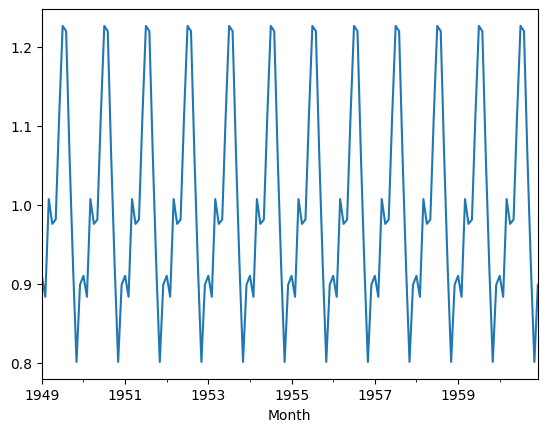

In [ ]:
result.seasonal.plot()

<Axes: xlabel='Month'>

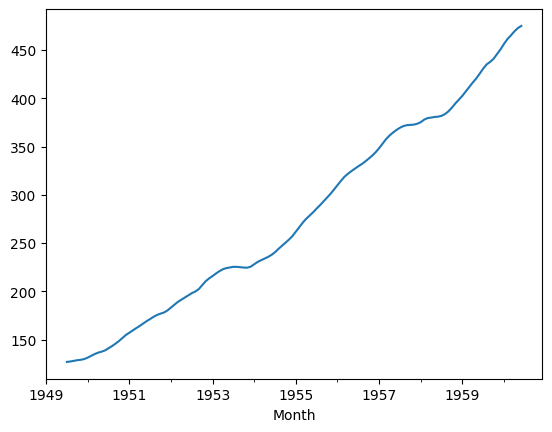

In [ ]:
result.trend.plot()

<Axes: xlabel='Month'>

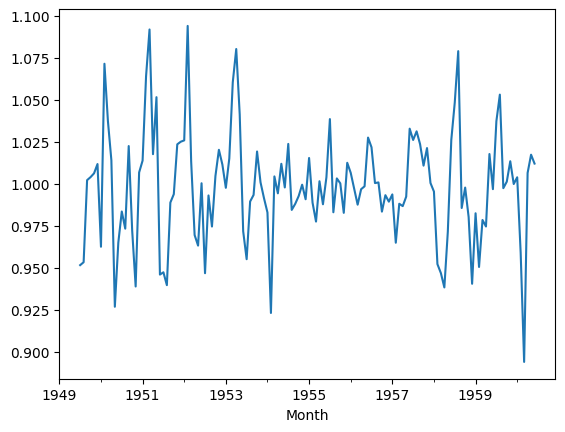

In [ ]:
result.resid.plot()

In [ ]:
ts_data= air['#Passengers']

In [ ]:
ts_data_log= np.log(ts_data)

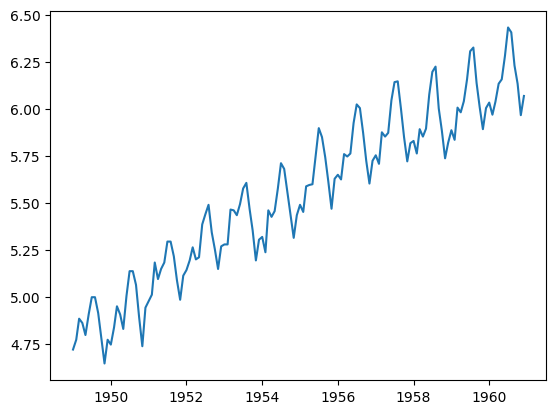

In [ ]:
plt.plot(ts_data_log)

In [ ]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


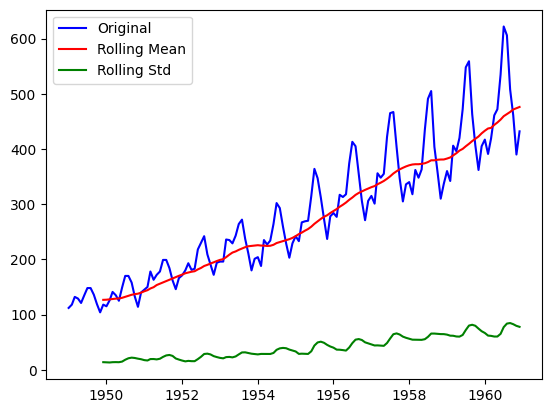

In [ ]:
test_stationarity(air['#Passengers'])

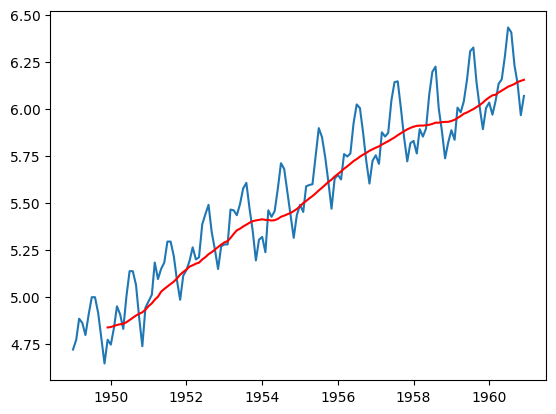

In [ ]:
movingAverage = ts_data_log.rolling(window = 12).mean()
movingSTD = ts_data_log.rolling(window = 12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

In [ ]:
ts_data_log_diff = ts_data_log - movingAverage
ts_data_log_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

In [ ]:
ts_data_log_diff.dropna(inplace=True)
ts_data_log_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

Results of Dickey-Fuller Test :

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


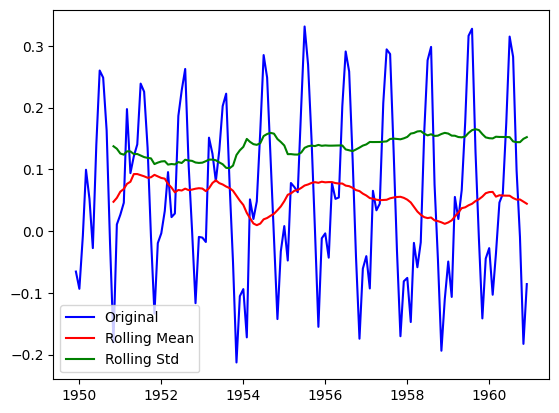

In [ ]:
test_stationarity(ts_data_log_diff)

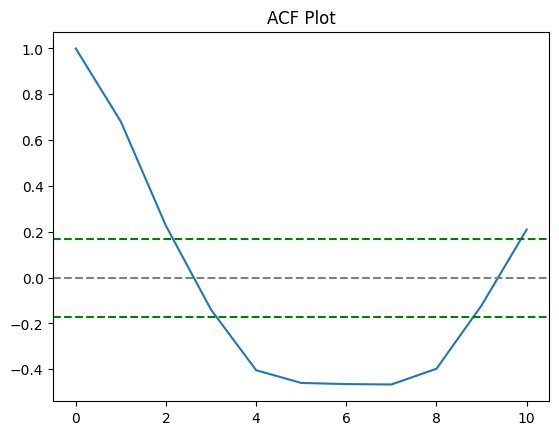

In [ ]:
# Plotting the ACF curve

plt.plot(np.arange(0,11), acf(ts_data_log_diff, nlags = 10))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

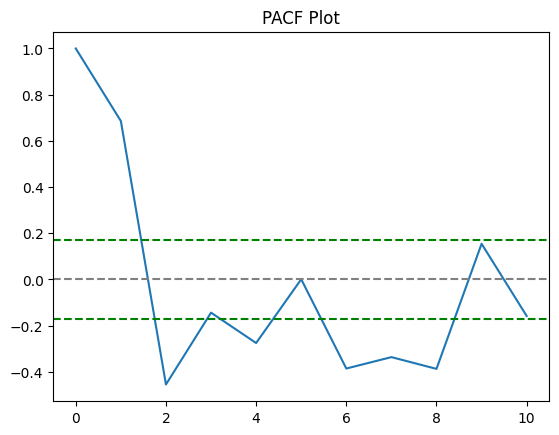

In [ ]:
# Plotting the PACF curve

plt.plot(np.arange(0,11), pacf(ts_data_log_diff, nlags = 10))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

In [ ]:
pip install statsmodels


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(air['#Passengers'], order=(1,1,1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Mon, 04 Mar 2024   AIC                           1394.683
Time:                        14:45:55   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.000     751.362    1172.492
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.65   Prob(JB):                         0.34
Heteroskedasticity (H):               7.00   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

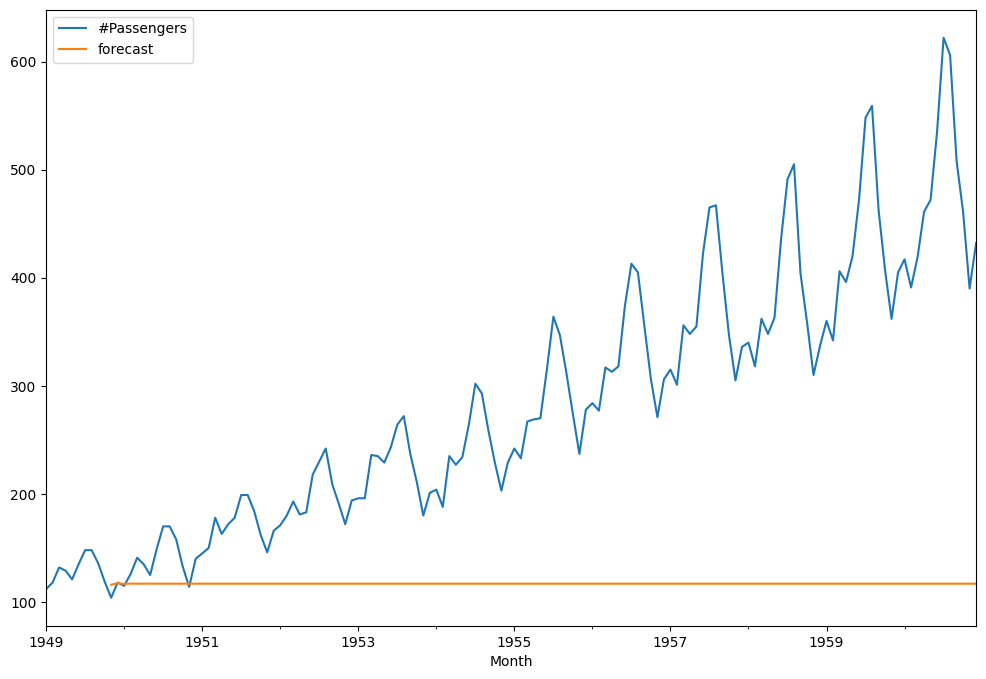

In [ ]:
air['forecast']= result.predict(start=10,end=190,dynamic=True)
air[['#Passengers','forecast']].plot(figsize=(12,8))

In [ ]:
result.predict()

1949-01-01      0.000000
1949-02-01    112.031916
1949-03-01    119.465739
1949-04-01    135.008557
1949-05-01    125.623055
                 ...    
1960-08-01    630.208754
1960-09-01    592.682963
1960-10-01    481.347765
1960-11-01    465.716986
1960-12-01    358.286564
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

In [ ]:
result.forecast(steps=20)

1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
1962-01-01    461.668879
1962-02-01    461.666198
1962-03-01    461.667469
1962-04-01    461.666866
1962-05-01    461.667152
1962-06-01    461.667017
1962-07-01    461.667081
1962-08-01    461.667050
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
result.fittedvalues

Month
1949-01-01      0.000000
1949-02-01    112.031916
1949-03-01    119.465739
1949-04-01    135.008557
1949-05-01    125.623055
                 ...    
1960-08-01    630.208754
1960-09-01    592.682963
1960-10-01    481.347765
1960-11-01    465.716986
1960-12-01    358.286564
Length: 144, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

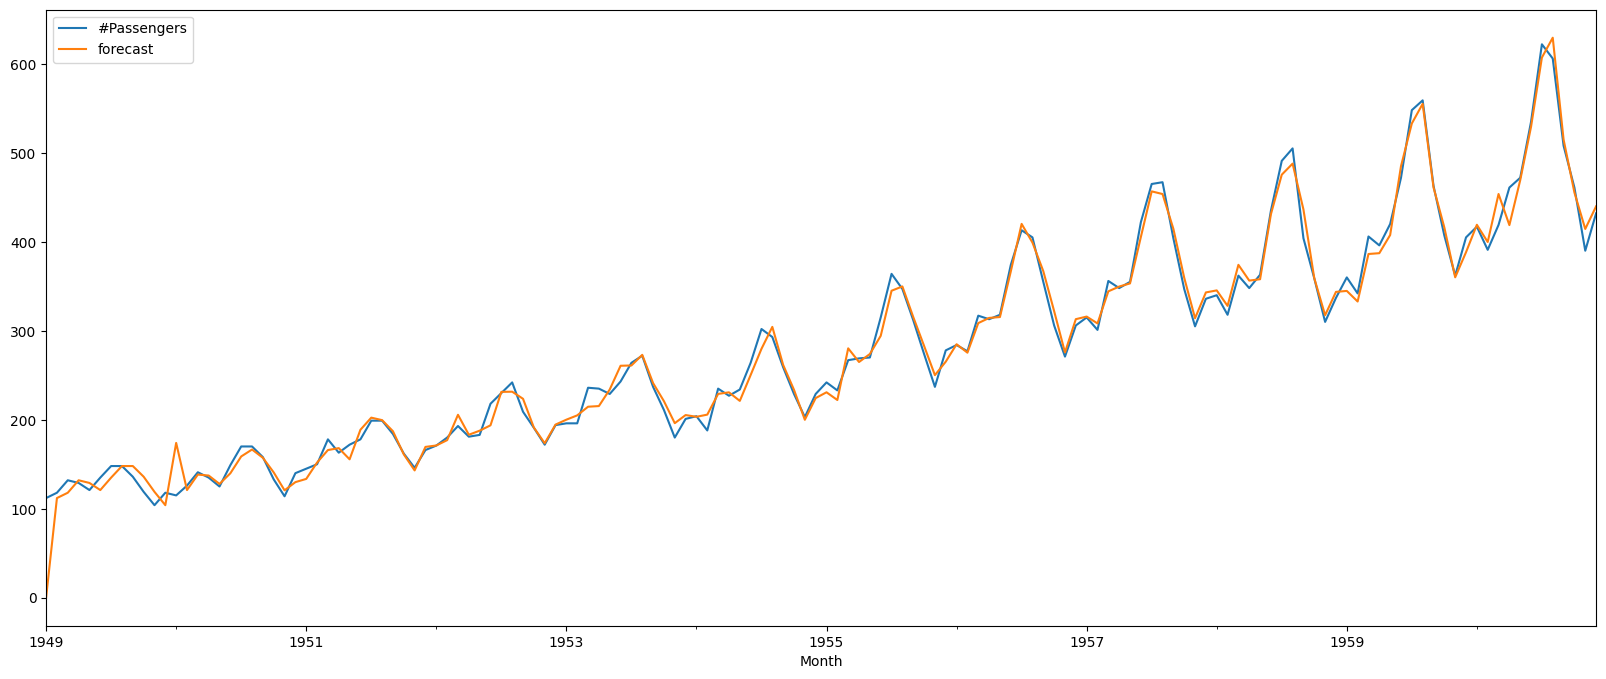

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model= SARIMAX(air['#Passengers'],order=(1,1,1),seasonal_order=(1,1,1,12))
results1=Model.fit()
air['forecast']= results1.predict(start=0,end=250)
air[['#Passengers','forecast']].plot(figsize=(20,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
ts = pd.Timestamp('2017-01-01 09:10:11')
ts+DateOffset(month=6)

Timestamp('2017-06-01 09:10:11')

<Axes: >

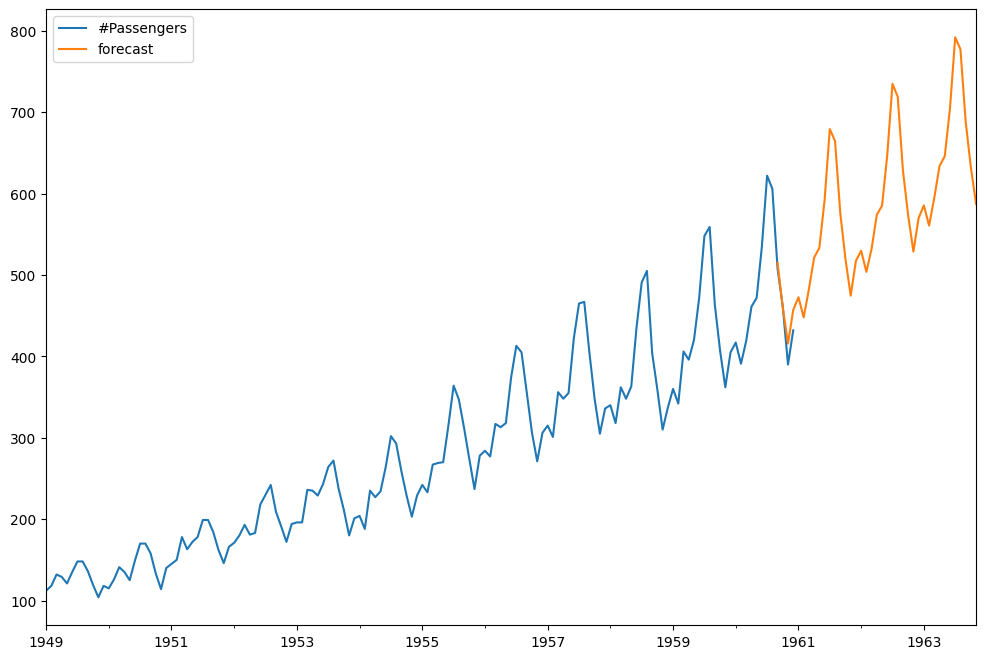

In [ ]:
from pandas.tseries.offsets import DateOffset
pred_date=[air.index[-1]+ DateOffset(months=x)for x in range(0,36)]
pred_date_air=pd.DataFrame(index=pred_date[1:],columns=air.columns)
pred_date_air
data=pd.concat([air,pred_date_air])
data['forecast'] = results1.predict(start = 140, end = 180,dynamic=True)
data[['#Passengers', 'forecast']].plot(figsize=(12, 8))

In [ ]:
pred_date=[air.index[-1]+ DateOffset(months=x)for x in range(0,36)]
pred_date[1:]

[Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-01 00:00:00'),
 Timestamp('1963-05-

In [ ]:
pred_date_air=pd.DataFrame(index=pred_date[1:],columns=air.columns)
pred_date_air

,#Passengers,forecast
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN
1961-06-01,NaN,NaN
1961-07-01,NaN,NaN
1961-08-01,NaN,NaN
1961-09-01,NaN,NaN
1961-10-01,NaN,NaN


In [ ]:
air.index[-1]

Timestamp('1960-12-01 00:00:00')

In [ ]:
pred_date[1:]

[Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-01 00:00:00'),
 Timestamp('1963-05-

In [ ]:
air.columns

Index(['#Passengers', 'forecast'], dtype='object')

In [ ]:
pred_date[1:]

[Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-01 00:00:00'),
 Timestamp('1963-05-

In [ ]:
pred_date_air

,#Passengers,forecast
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN
1961-06-01,NaN,NaN
1961-07-01,NaN,NaN
1961-08-01,NaN,NaN
1961-09-01,NaN,NaN
1961-10-01,NaN,NaN


In [ ]:
data

,#Passengers,forecast
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1968-11-01,NaN,1356.080786
1968-12-01,NaN,1356.080931
1969-01-01,NaN,1412.084702
1969-02-01,NaN,1418.084836


In [ ]:
results1.forecast(20)

1961-01-01    449.330152
1961-02-01    424.386124
1961-03-01    459.032047
1961-04-01    497.864870
1961-05-01    509.862668
1961-06-01    568.258390
1961-07-01    655.810592
1961-08-01    641.190537
1961-09-01    546.392179
1961-10-01    496.800936
1961-11-01    427.674031
1961-12-01    471.235499
1962-01-01    484.960690
1962-02-01    458.867488
1962-03-01    487.372980
1962-04-01    529.139641
1962-05-01    540.212636
1962-06-01    602.877376
1962-07-01    689.917585
1962-08-01    674.018052
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
air

,#Passengers,forecast
Month,,
1949-01-01,112,0.000000
1949-02-01,118,111.997241
1949-03-01,132,118.000055
1949-04-01,129,131.999303
1949-05-01,121,129.000236
...,...,...
1960-08-01,606,629.390776
1960-09-01,508,515.007964
1960-10-01,461,455.437774
